<a href="https://colab.research.google.com/github/calderonf/CursoMachineLearning/blob/master/Codigo/k_means_version_profesor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import distance# por favor buscar la documentacion oficial de la función https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance
from sklearn.preprocessing import StandardScaler# por favor buscar la documentacion oficial de la función
#https://scikit-learn.org/stable/modules/preprocessing.html
%matplotlib inline
#https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

In [ ]:
df = pd.read_csv('cluster_validation_data.txt', sep=",", header=None)
df.head()# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

,0,1
0,2.510076,2.159303
1,3.739776,0.974175
2,-0.142930,2.960866
3,2.817929,2.268013
4,2.302407,2.119619


# Implementacion del método de K-Means

In [ ]:
def kmedias(X,k,max_iterations=100,random_state=0,verbose=False):
    '''
    X: multidimensional data axis=0 "rows" feature "cols" measures
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    random_state: the seed random_state=0
    verbose:the verbose level, verbose=False

    Steps:
    1. Convert data to numpy aray
    2. Pick indices of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change
    
    Return:
    np.array: containg the classes of each data point
    centroids: the centroids of K-means

    Changes:
    centroids are added as output
    added random seed
    added verbose level

    '''
    #if isinstance(X, pd.DataFrame):X = X.values
    np.random.seed(seed=random_state)
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for n_iter in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])#lst comprehension https://www.programiz.com/python-programming/list-comprehension
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):
          if (verbose):
            print("K= ",k," sale por convergencia en iteracion ",n_iter+1)
          break
        P = tmp
    return P,centroids

In [ ]:
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
P,centroids = kmedias(X,k=3)
X = sc.inverse_transform(X)
centroids = sc.inverse_transform(centroids)

K=  3  sale por convergencia en iteracion  2


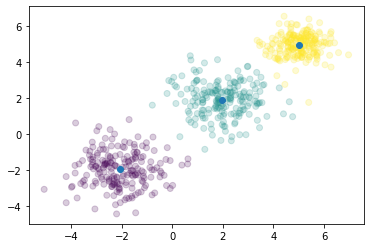

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=P,alpha=0.2)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(centroids[:,0],centroids[:,1],alpha=1)
plt.show()

# Selección del K por el método del codo.

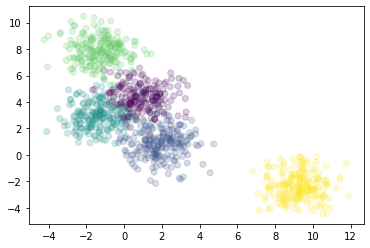

In [ ]:
from sklearn.datasets import make_blobs
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#probar con:
#   Casos ideales:
#     n_samples = 1000, centers = 3, n_features=2, shuffle=True, random_state=200
#     n_samples = 1000, centers = 2, n_features=2, shuffle=True, random_state=3
#     n_samples = 1000, centers = 6,center_box=(-20,20), n_features=2, shuffle=True, random_state=6 # probar este y poner random_state=6 al kmeans
#   Casos mas reales:
#     n_samples = 1000, centers = 4, n_features=2, shuffle=True, random_state=666
#     n_samples = 1000, centers = 5, n_features=2, shuffle=True, random_state=0
#     
X, y = make_blobs(n_samples = 1000, centers = 5, n_features=2, shuffle=True, random_state=0)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.2)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

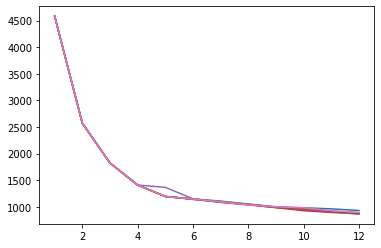

In [ ]:
#random_state=0
for random_state in range(1,8):

  kinicial=1
  kfinal=1+12
  step=1
  WSS=[]
  K=[]
  for k in range(kinicial,kfinal,step):
    Labels,centroides = kmedias(X,k=k,random_state=random_state) # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
    distances=distance.cdist(X, centroides, 'euclidean')# esto nos da una matriz de todos los puntos a todos los centroides, solo nos interesan la suma de las menores distancias.
    sum_of_distances=[np.sum(distances[Labels==l][:,l]) for l in range(0,k,1)]
    WSS.append(np.sum(sum_of_distances))
    K.append(k)  
  #print(WSS)
  plt.plot(K,WSS)

plt.show()

# Selección del K por el método de Siluetas.

In [ ]:
from sklearn.metrics import silhouette_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

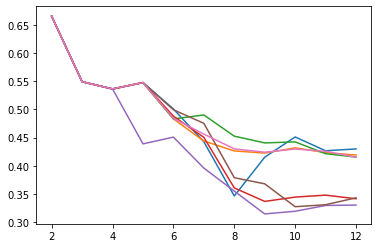

In [ ]:
#random_state=6
for random_state in range(1,8):
  kinicial=2#este no lo inicio en K =1 porque la silueta no lo soporta
  kfinal=1+12
  step=1
  Silueta=[]
  K=[]
  for k in range(kinicial,kfinal,step):
    Labels,centroides = kmedias(X,k=k,random_state=random_state) # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
    Silueta.append(silhouette_score(X, Labels, metric = 'euclidean'))
    K.append(k)  
  #print(Silueta)
  plt.plot(K,Silueta)

plt.show()

# Multiples ejecuciones del algoritmo de K-means para buscar el minimo global

In [ ]:
from sklearn.cluster import KMeans 
# https://www.tensorflow.org/api_docs/python/tf/compat/v1/estimator/experimental/KMeans
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html

In [ ]:
X, y = make_blobs(n_samples = 1000, 
                  centers = 6,center_box=(-20,20), 
                  n_features=2, shuffle=True, random_state=6)

In [ ]:
kmeans=KMeans(n_clusters=6,
              init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
              n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
              max_iter=300, #máximo nuero de iteraciones
              tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
              verbose=0, # modo charlador activado!
              random_state=None, # semilla de numeritos aleatorios
              copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso, ver mas detalles en la función
              #n_jobs='deprecated', #will be removed in 0.25
              algorithm='auto')#{“auto”, “full”, “elkan”}, default=”auto”=elkan


In [ ]:
kmeans.fit(X)
labels=kmeans.predict(X)

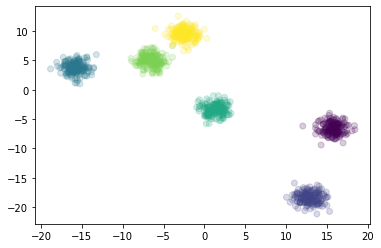

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.2)
plt.show()

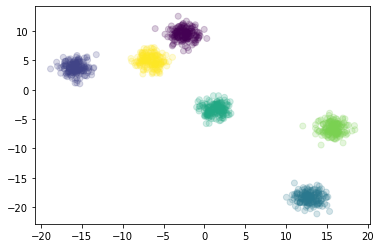

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=labels,alpha=0.2)
plt.show()